In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
#     urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [53]:
import pandas as pd

In [54]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [85]:
housing_data = load_housing_data()

In [86]:
housing_data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13530,-117.30,34.18,19.0,2526.0,381.0,1176.0,381.0,5.5136,137100.0,INLAND
1372,-122.11,38.01,41.0,1345.0,272.0,718.0,283.0,3.3831,129400.0,NEAR BAY
12460,-114.60,33.60,21.0,1988.0,483.0,1182.0,437.0,1.6250,62000.0,INLAND
15134,-116.92,32.82,17.0,2492.0,494.0,1278.0,439.0,2.8875,155700.0,<1H OCEAN
17389,-120.45,34.97,10.0,1897.0,354.0,1353.0,357.0,3.7679,131300.0,<1H OCEAN
20480,-118.70,34.28,25.0,2377.0,491.0,1200.0,439.0,4.7083,196100.0,<1H OCEAN
9697,-121.61,36.69,19.0,9899.0,2617.0,11272.0,2528.0,2.0244,118500.0,<1H OCEAN
594,-122.08,37.71,38.0,1663.0,295.0,781.0,301.0,5.0519,227000.0,NEAR BAY
10521,-117.69,33.55,3.0,1618.0,266.0,710.0,246.0,6.0743,274300.0,<1H OCEAN
6798,-118.14,34.07,52.0,695.0,145.0,523.0,170.0,3.6650,220400.0,<1H OCEAN


In [87]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [88]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [89]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


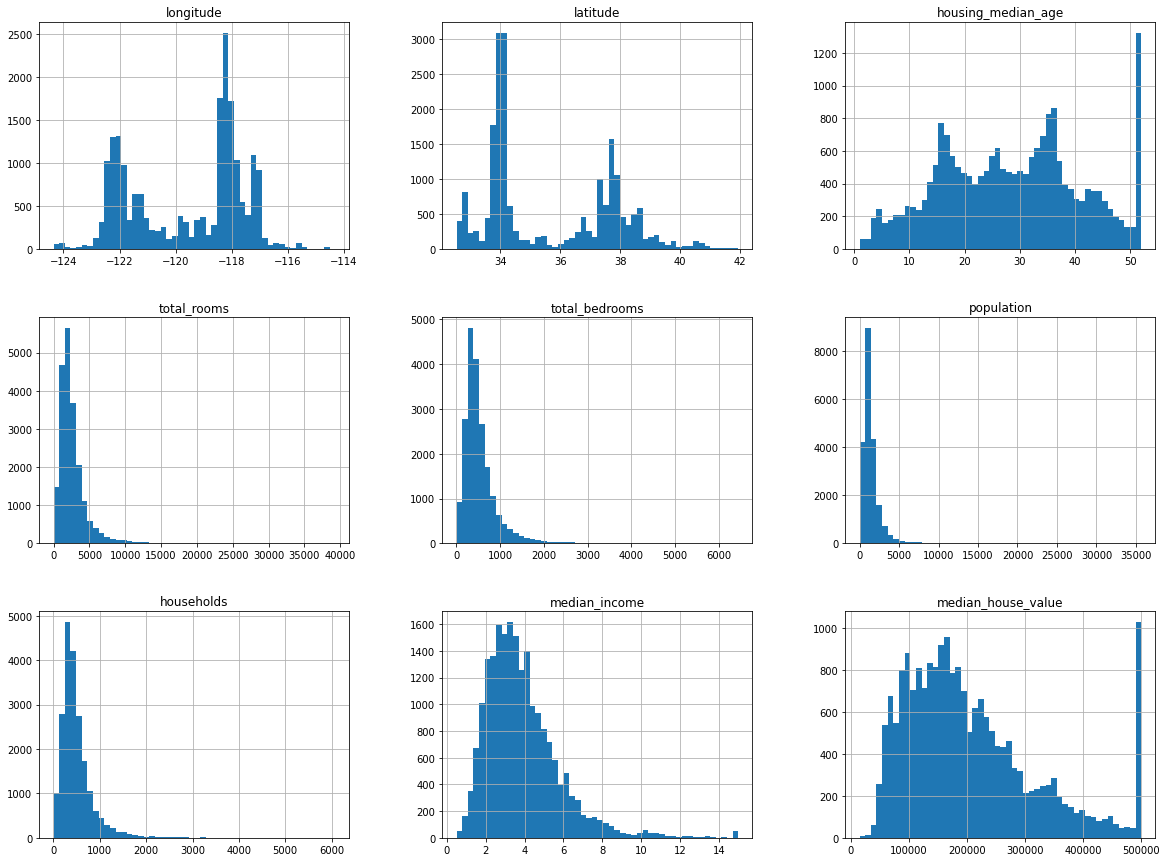

In [90]:
%matplotlib inline

import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [91]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing_data, 0.2)

# Another way using scikit-learn bulit-in function
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [92]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"], 
                                    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                    labels=[1, 2, 3, 4, 5])

In [93]:
len(train_set), len(test_set)

(16512, 4128)

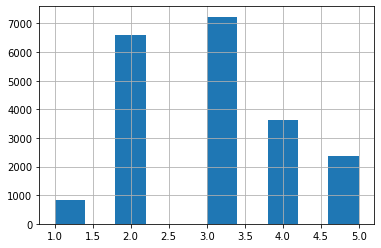

In [94]:
housing_data["income_cat"].hist();

In [95]:
# Stratified Sampling:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [96]:
for i, j in split.split(housing_data, housing_data["income_cat"]):
    print(i, j)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [97]:
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print(housing_data["income_cat"].value_counts() / len(housing_data))

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [98]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [99]:
housing_data = strat_train_set.copy()
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


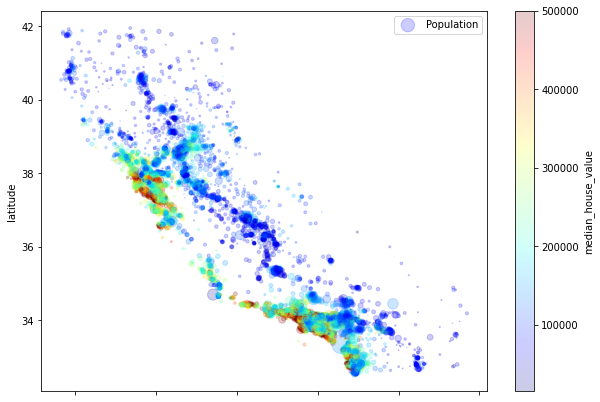

In [100]:
housing_data.plot(kind="scatter", 
                  x="longitude", 
                  y="latitude", 
                  alpha=0.2,
                  s=housing_data["population"]/100 ,
                  label="Population",
                  figsize=(10,7),
                  c="median_house_value",
                  cmap=plt.get_cmap("jet"),
                  colorbar=True
                 )
plt.legend();

In [101]:
corr_matrix = housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

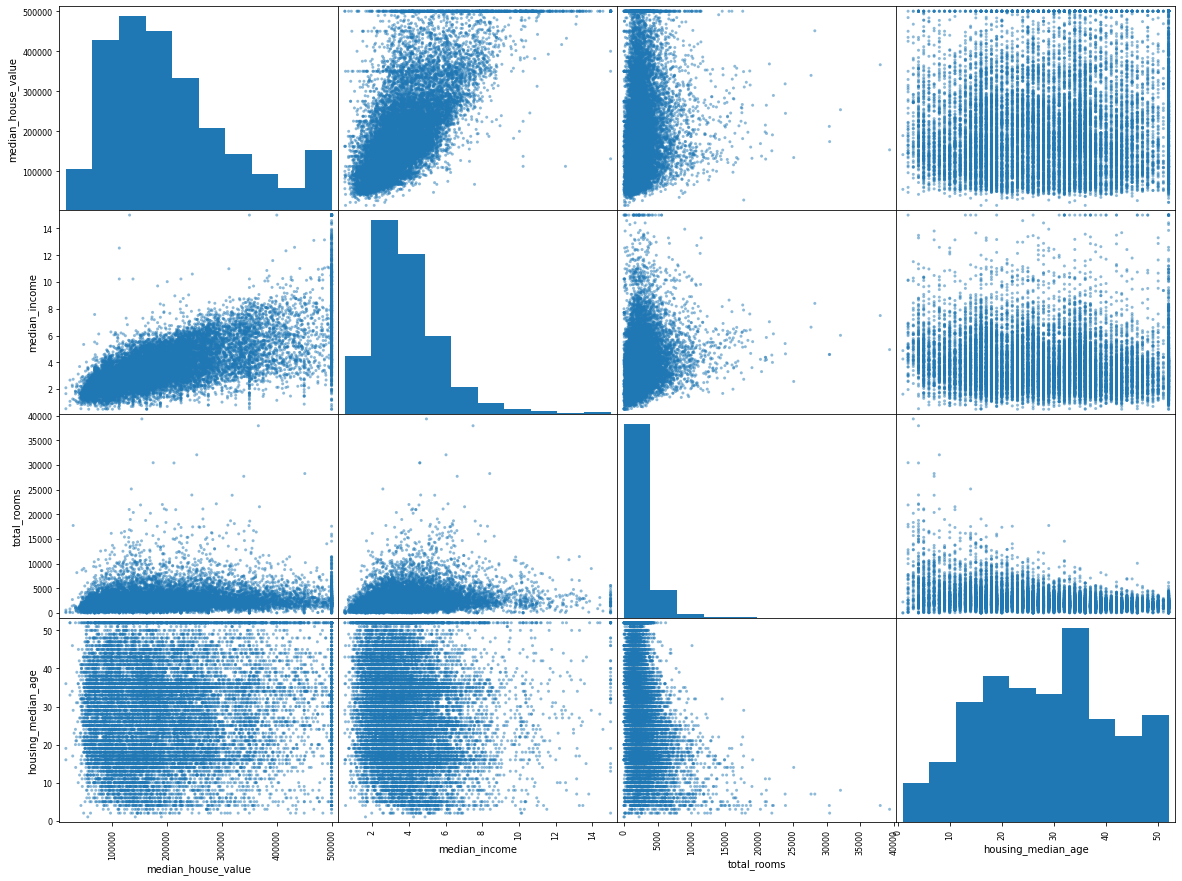

In [102]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing_data[attributes], figsize=(20,15))
plt.show()

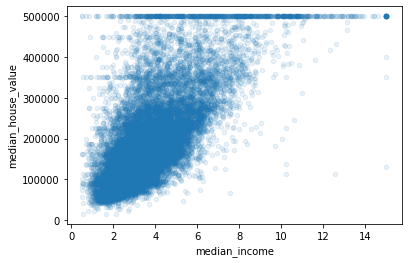

In [103]:
housing_data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1);

In [104]:
corr_matrix = housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [105]:
housing_labels = housing_data["median_house_value"]
housing_data = housing_data.drop("median_house_value", axis=1)

In [106]:
# A custom tranformer to add new features to the data
# can be used later for data piplines
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_ratio = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_ratio]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
            

In [107]:
# Transformation Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
                    ("imputer", SimpleImputer(strategy="median")),
                    ("attribs_adder", CombinedAttributesAdder()),
                    ("std_scaler", StandardScaler())
])

# Handling all the features together using a single Transformer
from sklearn.compose import ColumnTransformer

num_attribs = ["median_income",    
                "total_rooms",
                "housing_median_age",
                "households",
                "total_bedrooms",
                "population",
                "longitude",
                "latitude"
]

cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                    ("num", num_pipeline, num_attribs),
                    ("cat", OneHotEncoder(), cat_attribs)   
])

housing_data_prepared = full_pipeline.fit_transform(housing_data)

In [108]:
# Creating a model 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(housing_data_prepared, housing_labels)

LinearRegression()

In [109]:
# Evaluating the model
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_data_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68890.60019928837